In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas_profiling as pdp
df = pd.read_csv("Medical_Cost.csv")
#print(df.head())
df.dropna(inplace = True)
df.describe()
df.profile_report()
df = (
    df.sort_values('charges', ascending = False)
    .reset_index(drop = True)
)

# max(medical_costs['bmi'])
# print(sum(medical_costs['sex']=='female'))
# medical_costs.sort_values('charges', ascending = False)



In [48]:
#sns.countplot(x = 'children', data = df, hue = 'smoker')
#df1 = df.groupby('smoker')['charges'].sum()
#df1
#sns.countplot(hue= 'smoker', x = 'charges', data = df)
df1 = df.loc[(df['smoker']) == 'yes']
print(df1['charges'].sum())
print(df1['charges'].count())
print(df1['charges'].mean())

8781763.521839999
274
32050.23183153284


In [49]:
df1 = df.loc[(df['smoker']) == 'no']
print(df1['charges'].count())
print(df1['charges'].sum())
hi = (df1['charges'].mean())

1064
8974061.468919
8434.268297856202


In [141]:
df1 = df.groupby(['smoker','charges'])

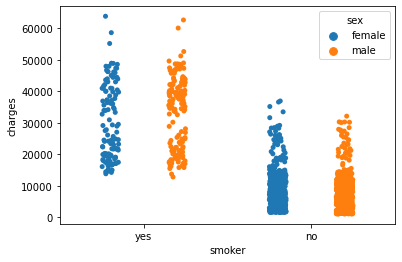

In [145]:
sns.stripplot(x = 'smoker', y= 'charges', data = df, hue = 'sex', jitter = True, dodge = True)
#sns.stripplot(x= 'day', y= 'total_bill', data = tips_df, jitter = True, hue = 'sex', dodge = True)

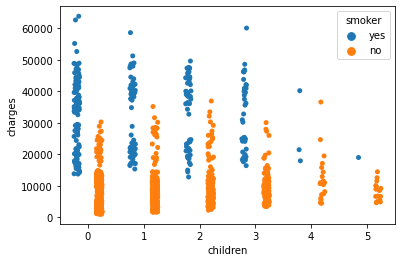

In [150]:
sns.stripplot(x = 'children', y = 'charges', data = df, jitter = True, hue = 'smoker', dodge = True)

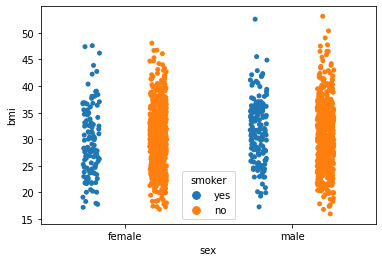

In [155]:
sns.stripplot(x = 'sex', y = 'bmi', data = df, hue = 'smoker', jitter = True, dodge = True)

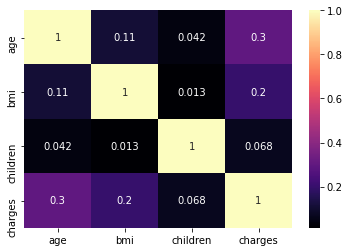

In [156]:
df_mx = df.corr()
sns.heatmap(df_mx, annot = True, cmap = 'magma')

In [160]:
sns.distplot(x = 'age', y = 'charges', hue = 'sex', data = df, jitter = True)

TypeError: distplot() got an unexpected keyword argument 'y'

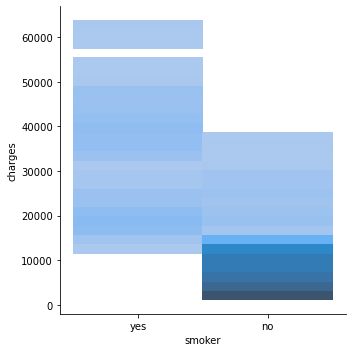

In [139]:
sns.displot(df, x = 'smoker', y= 'charges')

In [ ]:
flights = sns.load_dataset('flights')
flights = flights.pivot_table(index='month', columns = 'year', values = 'passengers')
sns.heatmap(flights, cmap = 'Blues', linecolor='white', linewidth = 1)

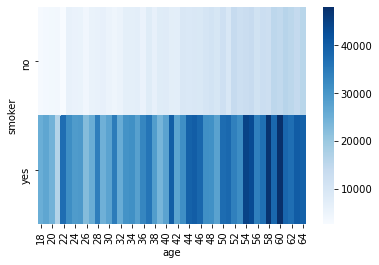

In [166]:
medical = df.pivot_table(columns = 'age', values = 'charges', index = 'smoker')
sns.heatmap(medical, cmap = 'Blues', linecolor='white')

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,54,female,47.410,0,yes,southeast,63770.42801
1,45,male,30.360,0,yes,southeast,62592.87309
2,52,male,34.485,3,yes,northwest,60021.39897
3,31,female,38.095,1,yes,northeast,58571.07448
4,33,female,35.530,0,yes,northwest,55135.40209


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine

data = load_wine() # this a data file that gets loaded

# Method chaining begins

df = (   
    pd.DataFrame(data.data,columns=data.feature_names)
    .rename(columns={"color_intensity": "ci"})
    .assign(color_filter=lambda x: np.where((x.hue > 1) & (x.ci > 7), 1, 0))
    .loc[lambda x: x['alcohol']>14]
    .sort_values("alcohol", ascending=False)
    .reset_index(drop=True)
    .loc[:, ["alcohol", "ci", "hue"]]
)

df